<h1 align="center">Final Project I</h1>

**Anggota Kelompok 5 :**
- Dhelya Apriliani Putri
- Anggita Yuniskara
- M Rinande Ansutia
- Rizky Mardhatillah

# Pendahuluan 
## Uber and Lyft Dataset Boston, MA
From 11-26-2018 to 12-18-2018

Dataset yang akan di olah kali ini adalah Uber and Lyft Dataset Boston, MA. Dataset mengandung banyak nilai NA. Ini adalah kumpulan data yang bagus untuk menggunakan Model Regresi Linier dan melihat pola antara predektor yang berbeda seperti jam dan harga.

Bagian yang menarik dari kumpulan data ini adalah data ini menyertakan data cuaca yang sesuai untuk jam tersebut dengan ringkasan singkat tentang cuaca. Faktor penting lainnya adalah suhu, angin, dan matahari terbenam. 

Semoga dengan data ini kami dapat menggunakan Model Regresi Linier dengan baik.

## Import Library yang dibutuhkan

In [52]:
import pandas as pd
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import make_scorer, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [54]:
#import file
df_can = pd.read_csv('rideshare_kaggle.csv')

In [55]:
#lima item pertama dalam dataset
df_can.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [56]:
df_can.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [57]:
#5 item terakhir dalam datset
df_can.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [58]:
# Melihhat tipe data
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [59]:
# Melihat jumlah rows dan columns
print(df_can.shape)

(693071, 57)


## Data Cleaning

In [60]:
# Menjumlah kan missing values
missing_values = df_can.isnull().sum()

In [61]:
print(missing_values[missing_values > 0])

price    55095
dtype: int64


In [62]:
# Menghapus Null values
df_can.dropna(subset=['price'], inplace=True)

In [63]:
df_can.shape

(637976, 57)

In [64]:
missing_values = df_can.isnull().sum()
missing_values

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [65]:
unique_cab_types = df_can['cab_type'].unique()
print(unique_cab_types)

['Lyft' 'Uber']


In [66]:
# Mengubah tipe data menjadi timeseries dengan pandas
df_can['datetime'] = pd.to_datetime(df_can['datetime'])

In [67]:
# Menjumlahkan data berdasrkan jam
hour_counts = df_can.groupby([df_can['datetime'].dt.hour, 'cab_type'])['id'].count().unstack().fillna(0)

In [68]:
df_can['datetime'].head()

0   2018-12-16 09:30:07
1   2018-11-27 02:00:23
2   2018-11-28 01:00:22
3   2018-11-30 04:53:02
4   2018-11-29 03:49:20
Name: datetime, dtype: datetime64[ns]

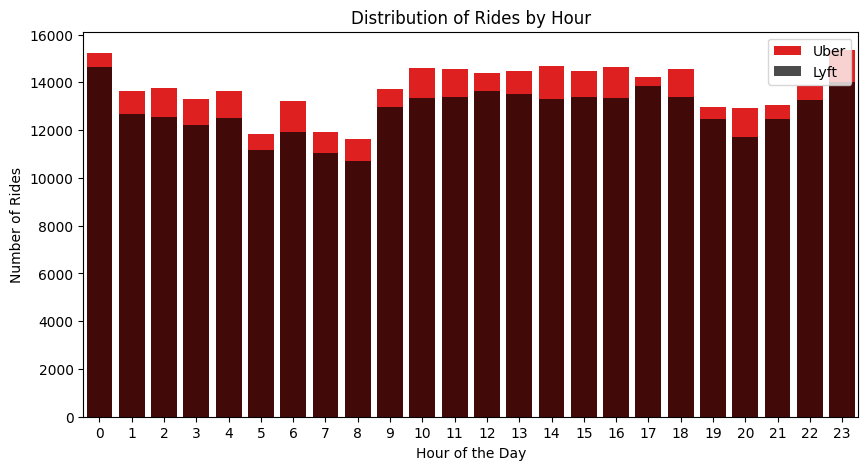

In [69]:
# Plotting Data
plt.figure(figsize=(10, 5))
sns.barplot(x=hour_counts.index, y=hour_counts['Uber'], label='Uber', color='red')
sns.barplot(x=hour_counts.index, y=hour_counts['Lyft'], label='Lyft', color='black', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Hour')
plt.legend()
plt.show()

Dari data diatas kita dapat mengetahui bahwa jumlah frekuensi "Distribution of Rides by Hour" paling tinggi adalah pukul 23 dan 00

In [70]:
# Mengelompokkan data berdasarkan hari dan cab_type
daily_counts = df_can.groupby([df_can['datetime'].dt.day, 'cab_type'])['id'].count().unstack().fillna(0)

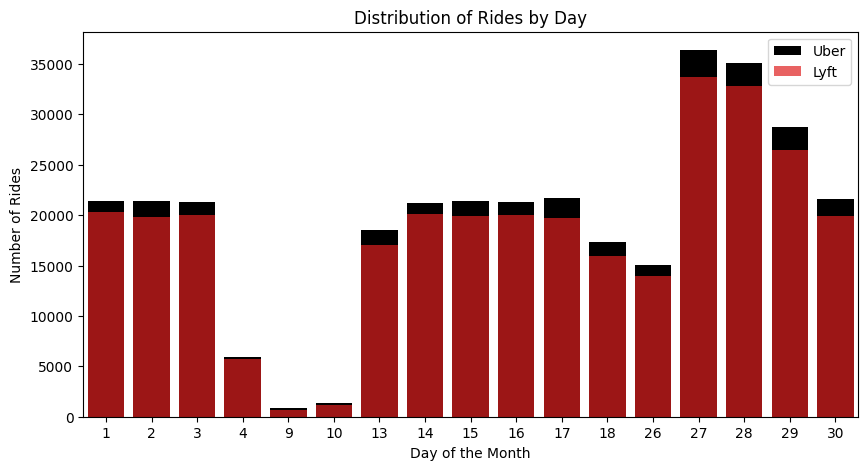

In [71]:
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_counts.index, y=daily_counts['Uber'], label='Uber', color='black')
sns.barplot(x=daily_counts.index, y=daily_counts['Lyft'], label='Lyft', color='red', alpha=0.7)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Day')
plt.legend()
plt.show()

In [72]:
monthly_counts = df_can.groupby([df_can['datetime'].dt.month, 'cab_type'])['id'].count().unstack().fillna(0)

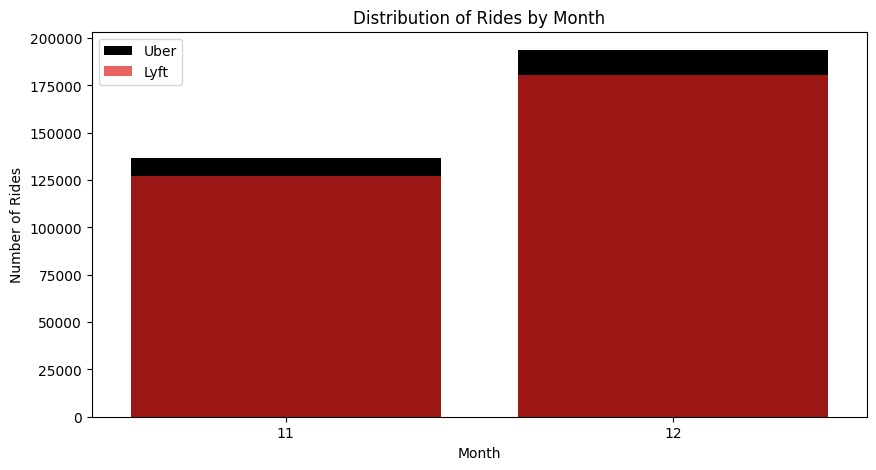

In [73]:
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_counts.index, y=monthly_counts['Uber'], label='Uber', color='black')
sns.barplot(x=monthly_counts.index, y=monthly_counts['Lyft'], label='Lyft', color='red', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Month')
plt.legend()
plt.show()

In [74]:
source_counts = df_can.groupby(['source', 'cab_type'])['id'].count().unstack().fillna(0)

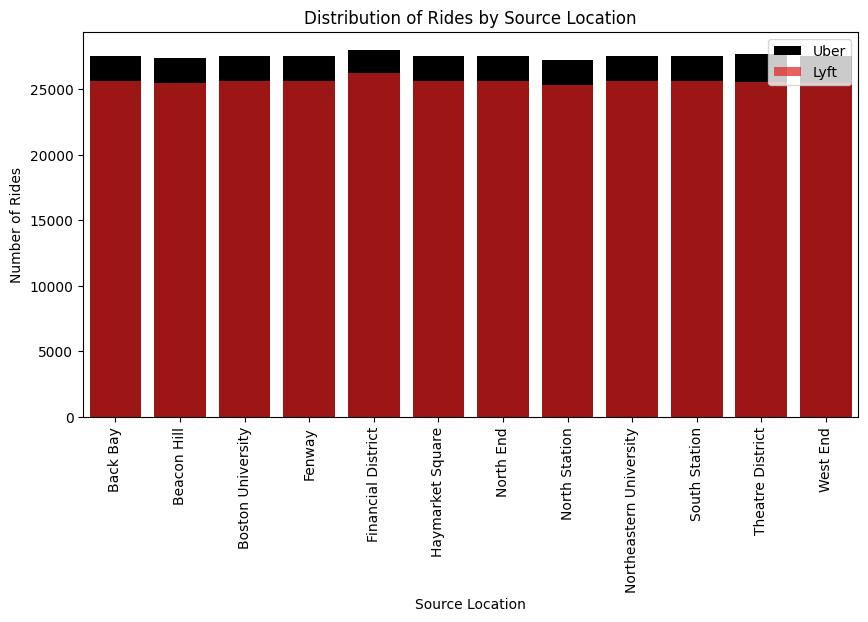

In [75]:
plt.figure(figsize=(10, 5))
sns.barplot(x=source_counts.index, y=source_counts['Uber'], label='Uber', color='black')
sns.barplot(x=source_counts.index, y=source_counts['Lyft'], label='Lyft', color='red', alpha=0.7)
plt.xlabel('Source Location')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Source Location')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [76]:
destination_counts = df_can.groupby(['destination', 'cab_type'])['id'].count().unstack().fillna(0)

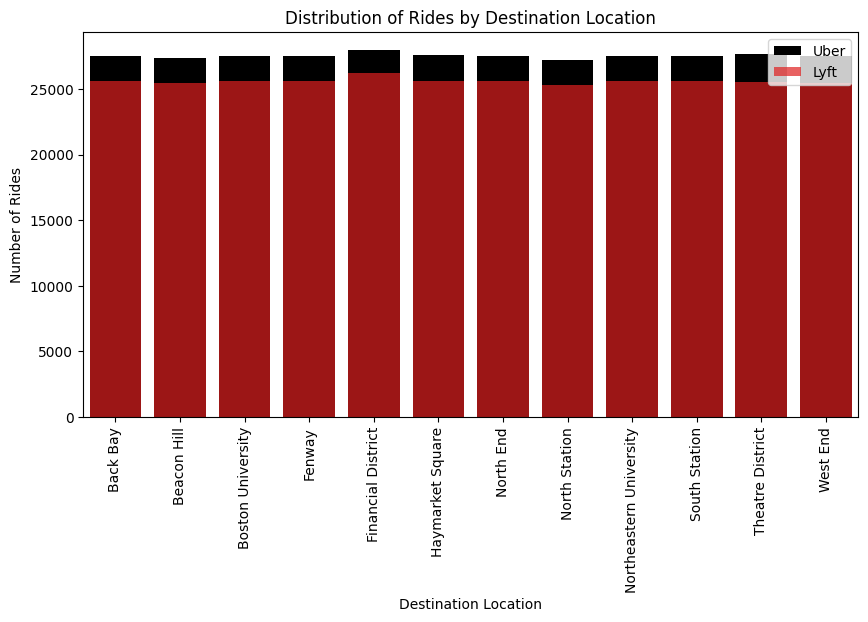

In [77]:
plt.figure(figsize=(10, 5))
sns.barplot(x=destination_counts.index, y=destination_counts['Uber'], label='Uber', color='black')
sns.barplot(x=destination_counts.index, y=destination_counts['Lyft'], label='Lyft', color='red', alpha=0.7)
plt.xlabel('Destination Location')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Destination Location')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [78]:
cab_type_counts = df_can['cab_type'].value_counts()

In [79]:
unique_cab_types = df_can['cab_type'].unique()
print(unique_cab_types)

['Lyft' 'Uber']


In [80]:
print("Counts of each 'cab_type':")
print(cab_type_counts)

Counts of each 'cab_type':
cab_type
Uber    330568
Lyft    307408
Name: count, dtype: int64


In [81]:
total_count = cab_type_counts.sum()
percentage_distribution = (cab_type_counts / total_count) * 100
summary_statistics = cab_type_counts.describe()

In [82]:
print("\nSummary Statistics:")
print(f"Total Count: {total_count}")
print(f"Percentage Distribution:\n{percentage_distribution}")
print("\nSummary Statistics for Count:")
print(summary_statistics)


Summary Statistics:
Total Count: 637976
Percentage Distribution:
cab_type
Uber    51.815115
Lyft    48.184885
Name: count, dtype: float64

Summary Statistics for Count:
count         2.000000
mean     318988.000000
std       16376.593052
min      307408.000000
25%      313198.000000
50%      318988.000000
75%      324778.000000
max      330568.000000
Name: count, dtype: float64


# Decision Tree
Decision tree adalah flowchart-like tree structure di mana internal node mewakili feature(atau atribute), branch mewakili decision rule, dan setiap leaf node mewakili outcome.

### 1. Tujuan Analisis:

**Prediksi Jenis Taksi:** cab_type adalah variabel dependen atau label yang tepat. Tujuannya adalah memahami bagaimana atribut-atribut lain memengaruhi atau memprediksi jenis taksi yang dipilih oleh pelanggan.
### 2. Klasifikasi Kategori:

**Penentuan Kategori:** Ketika memprediksi kategori atau label, seperti jenis taksi, dalam sebuah tugas klasifikasi memerlukan variabel dependen yang merupakan target prediksi. Dalam hal ini, cab_type akan menjadi label yang akan diprediksi oleh model.
### 3. Penentuan Jenis Taksi:

**Rekomendasi Jenis Taksi:** Model ini memungkinkan untuk memberikan rekomendasi tentang jenis taksi yang paling sesuai berdasarkan atribut lainnya. Misalnya, model dapat membantu pelanggan dalam memilih taksi yang paling efisien atau ekonomis berdasarkan waktu, harga, cuaca, atau faktor lainnya.
### 4. Analisis Pola Konsumen:

**Memahami Preferensi Konsumen:** Dengan menjadikan cab_type sebagai variabel dependen, memungkinkan untuk dapat menganalisis preferensi konsumen terhadap jenis taksi tertentu dan mengidentifikasi pola atau faktor-faktor yang memengaruhi pilihan mereka. Ini dapat membantu dalam pengambilan keputusan bisnis, pemasaran, dan perbaikan layanan.
Dengan menjadikan cab_type sebagai variabel dependen, ini memungkinkan model untuk belajar dari data historis dan melakukan prediksi atau klasifikasi jenis taksi berdasarkan atribut-atribut lainnya. Ini membantu dalam pemahaman lebih mendalam tentang perilaku konsumen dan memberikan landasan untuk pengambilan keputusan yang lebih baik dalam bisnis atau aplikasi yang melibatkan transportasi.

In [83]:
df = df_can.drop(['id','source', 'destination', 'product_id','name', 'latitude', 'longitude', 'apparentTemperature', 'short_summary', 'long_summary',
            'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime',
            'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
            'sunriseTime', 'sunsetTime', 'moonPhase', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime'], axis = 1)

In [84]:
df.head()

,timestamp,hour,day,month,datetime,timezone,cab_type,price,distance,surge_multiplier,...,windSpeed,windGust,windGustTime,visibility,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Lyft,5.0,0.44,1.0,...,8.66,9.17,1545015600,10.000,0.1276,1544979600,39.89,43.68,33.73,38.07
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Lyft,11.0,0.44,1.0,...,11.98,11.98,1543291200,4.786,0.1300,1543251600,40.49,47.30,36.20,43.92
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Lyft,7.0,0.44,1.0,...,7.33,7.33,1543334400,10.000,0.1064,1543338000,35.36,47.55,31.04,44.12
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Lyft,26.0,0.44,1.0,...,5.28,5.28,1543514400,10.000,0.0000,1543507200,34.67,45.03,30.30,38.53
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Lyft,9.0,0.44,1.0,...,9.14,9.14,1543446000,10.000,0.0001,1543420800,33.10,42.18,29.11,35.75


In [85]:
unique_cab_types = df['cab_type'].unique()
print(unique_cab_types)

['Lyft' 'Uber']


In [86]:
df.isnull().sum()

timestamp                 0
hour                      0
day                       0
month                     0
datetime                  0
timezone                  0
cab_type                  0
price                     0
distance                  0
surge_multiplier          0
temperature               0
precipIntensity           0
precipProbability         0
humidity                  0
windSpeed                 0
windGust                  0
windGustTime              0
visibility                0
precipIntensityMax        0
uvIndexTime               0
temperatureMin            0
temperatureMax            0
apparentTemperatureMin    0
apparentTemperatureMax    0
dtype: int64

In [87]:
 df.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'cab_type',
       'price', 'distance', 'surge_multiplier', 'temperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax'],
      dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   timestamp               637976 non-null  float64       
 1   hour                    637976 non-null  int64         
 2   day                     637976 non-null  int64         
 3   month                   637976 non-null  int64         
 4   datetime                637976 non-null  datetime64[ns]
 5   timezone                637976 non-null  object        
 6   cab_type                637976 non-null  object        
 7   price                   637976 non-null  float64       
 8   distance                637976 non-null  float64       
 9   surge_multiplier        637976 non-null  float64       
 10  temperature             637976 non-null  float64       
 11  precipIntensity         637976 non-null  float64       
 12  precipProbability       637976 non-

In [89]:
# Transformasi data menjadi numerik
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['cab_type'] = enc.fit_transform(df['cab_type'].values)

In [90]:
feature_cols = ['hour', 'day', 'month', 'distance', 'price', 'temperature', 'surge_multiplier', 'precipIntensityMax', 'precipIntensity', 'uvIndexTime', 'temperatureMin', 'temperatureMax', 'humidity', 'windSpeed', 'windGust', 'apparentTemperatureMax']
X = df[feature_cols]
y = df['cab_type']

In [91]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()


In [92]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9034133954742336


## Visualizing Decision Trees

In [93]:
class_names = df['cab_type'].unique().astype(str)

import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
 class_names=class_names, # the target names.
 feature_names=feature_cols, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

## Optimizing Decision Tree Performance

In [94]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifer correct?
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.6475785425799272


In [95]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, class_names=['0', '1'], feature_names=feature_cols, filled=True,
                    rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

In [96]:
df.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'cab_type',
       'price', 'distance', 'surge_multiplier', 'temperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax'],
      dtype='object')

In [97]:
df.copy()

,timestamp,hour,day,month,datetime,timezone,cab_type,price,distance,surge_multiplier,...,windSpeed,windGust,windGustTime,visibility,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,0,5.0,0.44,1.0,...,8.66,9.17,1545015600,10.000,0.1276,1544979600,39.89,43.68,33.73,38.07
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,0,11.0,0.44,1.0,...,11.98,11.98,1543291200,4.786,0.1300,1543251600,40.49,47.30,36.20,43.92
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,0,7.0,0.44,1.0,...,7.33,7.33,1543334400,10.000,0.1064,1543338000,35.36,47.55,31.04,44.12
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,0,26.0,0.44,1.0,...,5.28,5.28,1543514400,10.000,0.0000,1543507200,34.67,45.03,30.30,38.53
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,0,9.0,0.44,1.0,...,9.14,9.14,1543446000,10.000,0.0001,1543420800,33.10,42.18,29.11,35.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,1,9.5,1.00,1.0,...,2.34,2.87,1543672800,9.785,0.0000,1543683600,31.42,44.76,27.77,44.09
693066,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,1,13.0,1.00,1.0,...,2.34,2.87,1543672800,9.785,0.0000,1543683600,31.42,44.76,27.77,44.09
693067,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,1,9.5,1.00,1.0,...,2.34,2.87,1543672800,9.785,0.0000,1543683600,31.42,44.76,27.77,44.09
693069,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,1,27.0,1.00,1.0,...,2.34,2.87,1543672800,9.785,0.0000,1543683600,31.42,44.76,27.77,44.09


# K-Nearest Neighbors

## Overview Model K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) adalah salah satu algoritma pembelajaran mesin yang digunakan untuk masalah klasifikasi dan regresi. Model ini didasarkan pada konsep bahwa objek yang serupa cenderung berada dekat satu sama lain dalam ruang fitur. Berikut beberapa poin penting terkait dengan KNN:

### Cara Kerja

1. **Menentukan Nilai K**: Pada awalnya, kita harus memilih jumlah tetangga terdekat (K) yang akan digunakan dalam proses klasifikasi atau regresi. Nilai K yang tepat dapat memengaruhi performa model.

2. **Perhitungan Jarak**: KNN menghitung jarak antara titik data yang akan diprediksi dan semua titik data dalam set training. Metrik jarak yang umum digunakan adalah Euclidean distance atau Manhattan distance. Kita dapat memilih metrik jarak yang sesuai dengan karakteristik data.

3. **Menentukan Tetangga Terdekat**: KNN memilih K titik data dengan jarak terdekat ke titik data yang akan diprediksi.

4. **Voting (Klasifikasi) atau Rata-rata (Regresi)**: Dalam klasifikasi, KNN melakukan voting mayoritas dari label neighbors untuk menentukan label dari titik data yang akan diprediksi. Dalam regresi, KNN menghitung rata-rata nilai dari tetangga untuk memprediksi nilai kontinu.

### Hyperparameter KNN

- **n_neighbors**: Jumlah neighbors terdekat yang akan digunakan dalam proses prediksi. Pemilihan nilai K yang optimal sangat penting, karena nilai yang terlalu kecil dapat menyebabkan model sensitif terhadap noise (outlier), sedangkan nilai yang terlalu besar dapat menghilangkan aspek lokalitas.
- **metric**: Metrik jarak yang akan digunakan, seperti 'euclidean' (jarak Euclidean) atau 'manhattan' (jarak Manhattan).
- **weights**: Menentukan cara memberi bobot pada tetangga. 'uniform' memberikan bobot yang sama pada semua tetangga, sementara 'distance' memberikan bobot berdasarkan kebalikan jarak.

### Keuntungan

- Dapat diterapkan terhadap data dengan berbagai macam distribusi
- Contoh, data tidak harus dapat dipisahkan dengan garis linear
- Sangat mudah dan intuitif
- Merupakan klasifikasi yang baik jika jumlah sampel yang tersedia cukup besar.

### Kelemahan

- Menentukan k dapat menjadi sulit
- Tahap testing memerlukan komputasi yang mahal
- Tidak memiliki tahapan training, seluruh proses dilakukan pada tahap testing
- Hal ini bertolak belakang dengan yang diinginkan. Biasanya tahap training memakan waktu yang lama, sedangkan kita menginginkan tahap testing yang cepat.
- Memerlukan sampel dalam jumlah besar untuk memperoleh akurasi yang baik.

### Evaluasi

- Untuk mengevaluasi performa model KNN, umumnya digunakan metrik seperti akurasi (untuk klasifikasi) atau Mean Squared Error (MSE) (untuk regresi).
- Cross-validation sering digunakan untuk menghindari overfitting dan menentukan parameter K yang optimal.

KNN adalah algoritma yang sering digunakan untuk melakukan data imputation.


### Melakukan Data Preprocessing KNN

In [98]:
df_knn = df.copy()
df_knn['datetime_unix'] = df_knn['datetime'].apply(lambda x: x.timestamp())
df_knn = df_knn.drop(columns=['datetime', 'timezone'])
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   timestamp               637976 non-null  float64
 1   hour                    637976 non-null  int64  
 2   day                     637976 non-null  int64  
 3   month                   637976 non-null  int64  
 4   cab_type                637976 non-null  int32  
 5   price                   637976 non-null  float64
 6   distance                637976 non-null  float64
 7   surge_multiplier        637976 non-null  float64
 8   temperature             637976 non-null  float64
 9   precipIntensity         637976 non-null  float64
 10  precipProbability       637976 non-null  float64
 11  humidity                637976 non-null  float64
 12  windSpeed               637976 non-null  float64
 13  windGust                637976 non-null  float64
 14  windGustTime            6

In [99]:
X = df_knn.drop('cab_type', axis=1)
y = df_knn['cab_type']

In [100]:
def count_outliers_iqr(df):
    outlier_counts = pd.DataFrame(columns=['Attribute', 'Outlier Count', 'Lower Bound', 'Upper Bound'])

    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outlier_count = len(outliers)
            outlier_counts = outlier_counts._append({'Attribute': column, 'Outlier Count': outlier_count, 'Lower Bound': lower_bound, 'Upper Bound': upper_bound}, ignore_index=True)

    return outlier_counts

In [101]:
data_outlier = count_outliers_iqr(df_knn)
data_outlier

C:\Users\VITO\AppData\Local\Temp\ipykernel_20236\2281726157.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outlier_counts = outlier_counts._append({'Attribute': column, 'Outlier Count': outlier_count, 'Lower Bound': lower_bound, 'Upper Bound': upper_bound}, ignore_index=True)


,Attribute,Outlier Count,Lower Bound,Upper Bound
0,timestamp,0,1.541369e+09,1.546903e+09
1,hour,0,-1.200000e+01,3.600000e+01
2,day,0,-9.500000e+00,5.050000e+01
3,month,0,9.500000e+00,1.350000e+01
4,cab_type,0,-1.500000e+00,2.500000e+00
5,price,5589,-1.125000e+01,4.275000e+01
6,distance,6672,-1.220000e+00,5.420000e+00
7,surge_multiplier,20975,1.000000e+00,1.000000e+00
8,temperature,33749,2.575500e+01,5.427500e+01
9,precipIntensity,138748,0.000000e+00,0.000000e+00


Karena data diatas memiliki banyak outlier maka dapat menggunakan minimal 3 neighbors agar data tidak bergabung dengan outlier.<br>
k yang lebih besar mungkin memperbaiki performance, namun k yang terlalu 
besar menghilangkan aspek lokalitas.

### Pembuatan Model KNN

Train test split dengan size 8:2

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

Menggunakan standardscaler

In [103]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Melakukan prediksi knn

In [105]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7751261795040597
Precision: 0.8058559145388223
Recall: 0.7468795749883032


Menampilkan confusion matrix

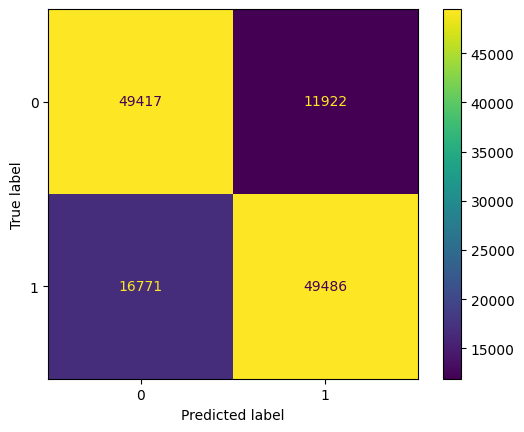

In [106]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

Dari data tersebut terlihat bahwa,<br>
TN (True Negative) = 49417<br>
TP (True Positive) = 49486<br>
FN (False Negative) = 16771<br>
FP (False Positive) = 11922<br>

### Optimisasi KNN

In [ ]:
knn_grid = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

grid_search = GridSearchCV(knn_grid, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

Setelah dijalankan, accuracy tertinggi didapatkan pada n_neighbors=5, dan weights='distance'

In [107]:
knn_best = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_best.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [108]:
y_pred_best = knn_best.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred)

print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)

Accuracy: 0.7971409762061507
Precision: 0.8220616155331132
Recall: 0.7468795749883032


Terlihat terdapat peningkatan accuracy dari prediksi

### Kesimpulan KNN

Setelah dilakukan beberapa pengujian, dapat dilihat bahwa nilai K sangat mempengaruhi keakuratan model. Selain itu, nilai bobot dari jarak tersebut juga mempengaruhi. 

<img src="https://i.ibb.co/KVFkQjM/qewdfs.png" alt="klasifikasi-tes" width="40%">

- Accuracy, ini merupakan tingkat ketepatan antara prediksi dan hasil sebenarnya. Semakin tinggi semakin bagus
- F1-Score, F1-score baru akan besar kalau kedua nilai precision dan recall besar. Jika ada salah satu yang rendah, maka nilai F1 juga akan rendah
- Recall, merupakan True Positive Rate
- Precision, merupakan TP/(TP+FP)

Dari data sebelum optimisasi dan setelah optimisasi, didapatkan bahwa nilai accuracy, precision, dan recall meningkat yang menandakan bahwa terjadi peningkatan performa model.

## Naive Bayes

## Summary Naive Bayes

Naive Bayes adalah salah satu algoritma klasifikasi dalam machine learning yang berdasarkan teori probabilitas. Gaussian NB adalah variasi dari algoritma Naive Bayes yang digunakan ketika data yang diamati memiliki distribusi Gaussian. Berikut adalah poin-poin terkait Gaussian Naive Bayes:

## 1. Dasar Teori

![Datacamp](https://images.datacamp.com/image/upload/f_auto,q_auto:best/v1543836882/image_3_ijznzs.png)

P(h): probabilitas hipotesis h menjadi benar (tanpa mempertimbangkan data). Ini dikenal sebagai probabilitas prior dari h.<br>
P(D): probabilitas data (tanpa mempertimbangkan hipotesis). Ini dikenal sebagai probabilitas prior.<br>
P(h|D): probabilitas hipotesis h yang diberikan data D. Ini dikenal sebagai probabilitas posterior.<br>
P(D|h): probabilitas data d diberikan bahwa hipotesis h benar. Ini dikenal sebagai probabilitas posterior.<br>

Gaussian Naive Bayes mengandalkan Teorema Bayes untuk menghitung probabilitas posterior kelas dari sebuah sampel, dengan asumsi bahwa fitur-fitur yang diamati dalam sampel mengikuti distribusi Gaussian. Dalam hal ini, "Naive" berarti asumsi bahwa setiap fitur adalah independen, meskipun dalam dunia nyata, independensi ini seringkali tidak terpenuhi.

## 2. Asumsi Distribusi Gaussian

Gaussian Naive Bayes bekerja dengan baik ketika data yang diamati memiliki distribusi Gaussian atau mendekati distribusi Gaussian. Ini berarti data kontinu yang terdistribusi normal cenderung memberikan hasil yang baik dengan algoritma ini.

## 3. Penggunaan

Gaussian Naive Bayes sering digunakan dalam aplikasi klasifikasi, terutama di mana data memiliki sifat distribusi Gaussian. Contoh penggunaan yang umum termasuk klasifikasi email spam atau non-spam, handwriting re, dan identifikasi pola medis.

## 4. Kelebihan

- Sederhana dan cepat dalam pelatihan dan prediksi.
- Cocok untuk data dengan banyak fitur.

## 5. Keterbatasan

- Mengasumsikan bahwa fitur-fitur adalah independen, yang mungkin tidak benar dalam banyak situasi.
- Kinerja buruk jika asumsi distribusi Gaussian tidak terpenuhi.

Gaussian Naive Bayes adalah algoritma klasifikasi yang kuat ketika asumsi-asumsi yang mendasarinya terpenuhi. Namun, sangat penting untuk memahami sifat data kita sebelum menggunakannya.


## Pembuatan Model Naive Bayes

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [124]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

Membuat model evaluation testing

In [126]:
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5504955771632192
F1 Score: 0.6783332419461449


Melakukan visualisasi confusion matrix

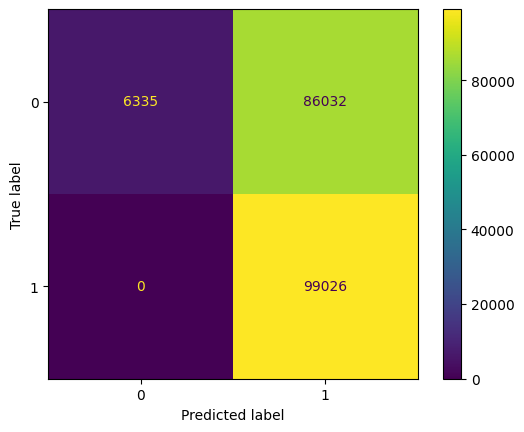

In [127]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

Dari data tersebut terlihat bahwa, <br>
TN (True Negative) = 6335<br>
TP (True Positive) = 99026<br>
FN (False Negative) = 0<br>
FP (False Positive) = 86032<br>

## Optimisasi Naive Bayes

In [134]:
gnb_grid = GaussianNB()

param_grid = {
    'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]],
    'var_smoothing': np.logspace(0,-9, num=5)
}

grid_search = GridSearchCV(gnb_grid, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (Accuracy):", grid_search.best_score_)

Best Parameters: {'priors': [0.8, 0.2], 'var_smoothing': 0.005623413251903491}
Best Score (Accuracy): 0.5518660591715157


In [131]:
best_gnb = GaussianNB(priors=[0.8, 0.2], var_smoothing=0.005623413251903491)
best_gnb.fit(X_train, y_train)

GaussianNB(priors=[0.8, 0.2], var_smoothing=0.005623413251903491)

In [132]:
y_pred = best_gnb.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5510494114204804
F1 Score: 0.677393978450134


### Kesimpulan

Dapat dilihat bahwa akurasi maksimum yang bisa didapatkan hanya sekitar 55.1%. Dengan demikian, bisa dibilang dataset ini kurang baik jika diaplikasikan menggunakan model Gauss. Terdapat beberapa faktor yang dapat mempengaruhi hal ini, seperti model dataset tersebut kurang mengikuti distribusi Gauss dan dataset cenderung kurang terdistribusi secara normal.

Untuk mencoba melakukan performa, kami menggunakan GridSearchCV yang melakukan cross validation dengn fold = K. Dengan memasukan parameter, priors dan var_smoothing. Dengan demikian, model tersebut dapat terjadi peningkatan performa walaupun sangat kecil.